<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1> Classification Model Development </h1>
<br><h4> Nivedita Venkatramanan </h4>
Hult International Business School<br>
MBAN_1, 2022, San Francisco <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Analytical Objectives of this Script</h3><br><br>
Develop a classification model on the Game of Thrones book's dataset to predict if a character is alive or not alive. <br>
The modeling will be done by following the below steps::<br>
1.  Analyze the dataset. <br>
2.  Feature Engineering of the variables. <br>
3.  Develop a basic Logistic Regression model. <br>
4.  Create a testing and training set. <br>
5.  Use the data on various models. <br>
6.  Pick the best model with the best AUC score. <br><br><br>

## Part I - Preparation & Exploring the Dataset <br><br>

In [1]:
# Importing required packages & libraries for analysis and model development

import os                                             ## OS 
import pandas as pd                                   ## data science essentials
import matplotlib.pyplot as plt                       ## essential graphical outputs
import seaborn as sns                                 ## enhanced graphical output
import numpy as np                                    ## numpy

import statsmodels.formula.api as smf                 ## regression modeling
from sklearn.model_selection import train_test_split  ## train/test split
import statsmodels.formula.api as smf                 ## linear modeling

from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.linear_model import LogisticRegression  # logistic regression


from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer                    # customizable scorer

from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm


<br>

In [2]:
pd.set_option('display.max_rows', 500)              ## setting display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = './GOT_character_predictions.xlsx'                 ## defining the path to the file 

## reading the file as a dataframe(df)
got = pd.read_excel(io         = file,      
                    sheet_name = 0,
                    header     = 0)
got.head(n = 10)                          ## displaying the head of the df limit to 10 rows

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0
5,6,Grazdan mo Ullhor,Good Master,1,Astapori,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.030100,0
6,7,Cleon,King of Astapor,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,0.103679,0
7,8,Ghael,Lord,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,0.023411,1
8,9,Grazdan,Good Master,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.013378,0
9,10,Moonshadow,NaN,0,Braavos,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,50.0,0.010033,1


**Loading the GoT data description** <br><br>

In [3]:
# pulling up data dictionary
got_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measu...
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house ...
9,spouse,Character's spouse(s)


In [4]:
## formatting and printing the dimensions of the dataset

print(f"""
Size of Original Dataset
------------------------

Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")


Size of Original Dataset
------------------------

Observations: 1836
Features:     23



### User defined functions that will be used in this notebook ###
The following user defined functions will be used to speed up certain parts of the modeling process. 

In [5]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        

########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<br>

## Part II - Analysis of the variables & Feature Engineering
In the below section, the variables of the dataset will be analyzed. The null values will be taken care of and accordingly imputed appropriately.  <br>

Since, we are going to classify whether a character is alive or not, *'isAlive'* will be our Y-variable or our dependent variable. 


In [6]:
## Getting info about the dataset
print(f"""
Information & data types of each variable
-----------------------------------------
""")
print(got.info(verbose = True))  



Information & data types of each variable
-----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book

In [7]:
## checking the summary stats for the numeric data
got.describe(include = [int, float]).round(decimals = 2)

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,391.00,1836.00,1836.00,1836.00,1836.00,1836.00,21.00,26.00,23.00,256.00,410.00,1836.00,1836.00
mean,918.50,0.61,1717.91,0.19,0.58,0.47,0.37,0.38,0.71,0.19,0.65,0.77,-1368.04,0.08,0.73
std,530.15,0.49,20587.05,0.39,0.49,0.50,0.48,0.48,0.46,0.40,0.49,0.42,20104.31,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,237.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.01,0.00
50%,918.50,1.00,267.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,27.00,0.03,1.00
75%,1377.25,1.00,285.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,49.75,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


In [8]:
## Checking value counts for age 
got['age'].value_counts(normalize = False).sort_index()

-298001.0     1
-277980.0     1
 0.0          2
 1.0          1
 2.0          1
 3.0          2
 5.0          1
 6.0          5
 7.0          1
 8.0          2
 9.0          8
 10.0         7
 11.0         7
 12.0         7
 13.0         8
 14.0         6
 15.0        13
 16.0        13
 17.0         8
 18.0        13
 19.0        19
 20.0        12
 21.0        15
 22.0        15
 23.0        14
 24.0         8
 25.0         6
 26.0         6
 27.0         6
 28.0         7
 29.0         4
 30.0         4
 31.0         4
 32.0         6
 33.0         1
 34.0         4
 35.0         6
 36.0         4
 37.0         5
 38.0         5
 39.0         7
 40.0         3
 41.0         6
 42.0         6
 43.0         2
 45.0         9
 46.0         4
 47.0         3
 48.0         4
 49.0         5
 50.0         4
 51.0         2
 52.0         3
 53.0         2
 54.0         4
 55.0         2
 56.0         7
 58.0         3
 60.0         5
 61.0         1
 62.0         1
 63.0         1
 64.0   

In [9]:
### creating a for loop to input NaN if age is less than zero 

for index, val in got.iterrows():
    if got.loc[index, 'age'] < 0:
        got.loc[index, 'age'] = float('nan')

## checking if we got rid of the negative number       
got['age'].value_counts(normalize = False).sort_index()

0.0       2
1.0       1
2.0       1
3.0       2
5.0       1
6.0       5
7.0       1
8.0       2
9.0       8
10.0      7
11.0      7
12.0      7
13.0      8
14.0      6
15.0     13
16.0     13
17.0      8
18.0     13
19.0     19
20.0     12
21.0     15
22.0     15
23.0     14
24.0      8
25.0      6
26.0      6
27.0      6
28.0      7
29.0      4
30.0      4
31.0      4
32.0      6
33.0      1
34.0      4
35.0      6
36.0      4
37.0      5
38.0      5
39.0      7
40.0      3
41.0      6
42.0      6
43.0      2
45.0      9
46.0      4
47.0      3
48.0      4
49.0      5
50.0      4
51.0      2
52.0      3
53.0      2
54.0      4
55.0      2
56.0      7
58.0      3
60.0      5
61.0      1
62.0      1
63.0      1
64.0      3
65.0      4
66.0      4
68.0      4
69.0      3
70.0      2
72.0      1
75.0      1
76.0      2
77.0      3
79.0      2
80.0      1
81.0      1
82.0      1
84.0      1
85.0      1
86.0      1
88.0      1
93.0      1
94.0      1
97.0      1
100.0    29
Name: age, dtype

In [10]:
### Proceeding to check the null values in the dataset 
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1428
popularity                       0
isAlive                          0
dtype: int64

In [11]:
# running the mv_flagger UDF to create a missing value variable. 

got = mv_flagger(df = got) 

## printing the columns
print(got.columns)

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age'], dtype='object')


<br>

In [12]:
## Using the text_split_feature UDF on the variable names. 

## Feature engineering step as name is distinct for every person, we can use number of names as a variable. 
text_split_feature(col = 'name', df = got) 
got['number_of_names'].head(n=5)

0    1
1    4
2    2
3    1
4    3
Name: number_of_names, dtype: int64

In [13]:
## Since, we have featured the name column, we can drop the name column and continue using number_of_names. 
got = got.drop(['name'], axis =1)

<br>

In [14]:
## Variable Title -- this is a categorical variable. 
## Since title is given to a character, we can assume that missing values means they have no title.
## It does not make sense to impute anything else due to lack of knowledge 

# imputing missing values 
got['title'] = got['title'].fillna('no_title')

# checking results
got['title'].isnull().sum(axis = 0)


0

In [15]:
## Feature for Title 
## Since there are many titles, grouping them into 3 groups so that we can perform one hot encoding on them later. 
## Ser has a high number of about 365 hence it can be considered a different group. 
## Also, on googling, I read that Ser is like Knight, and 
## since knights fight it makes sense to have them into a category of their own

## for loop iterating the rows to check column title
for index, val in got.iterrows():
        
    if got.loc[index, 'title'].lower()  == 'ser':  # if title is ser, map as ser (but now lowercase)
        got.loc[index, 'title'] = 'ser'
    
    elif got.loc[index, 'title'].lower()  == 'no_title':  # if there is no title, then map them as no_title
        got.loc[index, 'title'] = 'no_title'
        
    else: 
        got.loc[index, 'title'] = 'other_title'       # else map as other_title (else clause for cleaner coding practice)

## checking the results 
got['title'].value_counts(normalize = False)     # we now have enough observations in each bucket

no_title       956
other_title    515
ser            365
Name: title, dtype: int64

<br>

In [16]:
## Checking the culture column 
got['culture'].value_counts(normalize = False)

Northmen                   118
Ironborn                   105
Free Folk                   50
Valyrian                    43
Braavosi                    41
Dornish                     21
Ghiscari                    21
Dothraki                    21
Valemen                     16
Rivermen                    16
Reach                       15
Vale mountain clans         14
Westeros                    12
Dornishmen                  11
Free folk                   10
Westerman                    9
northmen                     9
Tyroshi                      7
Stormlands                   6
Qartheen                     5
Northern mountain clans      5
Ironmen                      4
Westermen                    4
Astapori                     4
Summer Isles                 4
First Men                    3
Lysene                       3
Meereenese                   3
Crannogmen                   3
Pentoshi                     3
Lhazareen                    2
Riverlands                   2
Wildling

In [17]:
## Culture ::
## Combining cultures that seem to be the same

for index, val in got.iterrows():
    
    if str(got.loc[index, 'culture']).lower()    == 'northmen':
           got.loc[index, 'culture'] = 'Northmen'
                    
    elif str(got.loc[index, 'culture']).lower()    == 'ironborn':          
             got.loc[index, 'culture'] = 'Ironborn'
            
    elif str(got.loc[index, 'culture']).lower()    == 'free folk':          
             got.loc[index, 'culture'] = 'Free Folk'
            
    elif str(got.loc[index, 'culture']).lower()    == 'braavos':          
             got.loc[index, 'culture'] = 'Braavosi'
    
    elif 'dornish' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Dornishmen'
    
    elif str(got.loc[index, 'culture']).lower()    == 'dorne':          
             got.loc[index, 'culture'] = 'Dornishmen'
            
    elif str(got.loc[index, 'culture']).lower()    == 'vale':          
             got.loc[index, 'culture'] = 'Valemen'
    
    elif str(got.loc[index, 'culture']).lower()    == 'ghiscaricari':          
             got.loc[index, 'culture'] = 'Ghiscari'
            
    elif 'storm' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Stormlands'
    
    elif 'qarth' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Qartheen'
    
    elif str(got.loc[index, 'culture']).lower()    == 'wildling':          
             got.loc[index, 'culture'] = 'Wildlings'
    
    elif str(got.loc[index, 'culture']).lower()    == 'astapor':          
             got.loc[index, 'culture'] = 'Astapori'
     
    elif str(got.loc[index, 'culture']).lower()    == 'westermen':          
             got.loc[index, 'culture'] = 'Westerman'
            
    elif 'summer isl' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Summer Islander'
            
    elif str(got.loc[index, 'culture']).lower()   == 'lyseni':          
             got.loc[index, 'culture'] = 'Lysene'
     
    elif 'norvos' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Norvoshi'
    
    elif 'andal' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Andals'       
    
    elif 'meereen' in str(got.loc[index, 'culture']).lower():          
             got.loc[index, 'culture'] = 'Meereenese'
    
    elif 'lhaza' in str(got.loc[index, 'culture']).lower():          ## end of loop 
             got.loc[index, 'culture'] = 'Lhazareen'


#checking results 
print(got['culture'].value_counts(normalize = False))


Northmen                   127
Ironborn                   106
Free Folk                   61
Valyrian                    43
Braavosi                    42
Dornishmen                  34
Ghiscari                    22
Dothraki                    21
Valemen                     17
Rivermen                    16
Reach                       15
Westerman                   15
Vale mountain clans         14
Westeros                    12
Stormlands                   7
Tyroshi                      7
Summer Islander              6
Qartheen                     6
Northern mountain clans      5
Astapori                     5
Lysene                       4
Meereenese                   4
Ironmen                      4
Wildlings                    4
Pentoshi                     3
Lhazareen                    3
First Men                    3
Crannogmen                   3
Norvoshi                     2
Qohor                        2
Riverlands                   2
Andals                       2
Sisterme

In [18]:
## Culture - this is a categorical variable. 
## Everyone might belong to a culture but since we dont know the ones which are missing, 
## we can categorize them as unknown

## Imputing missing cultures as unknown_culture
got['culture'] = got['culture'].fillna('unknown_culture')

# checking results
got['culture'].isnull().sum(axis = 0)

0

In [19]:
## Feature Engineering for Culture
## Since there are many cultures, grouping them into 3 groups so that we can perform one hot encoding on them later. 
## It makes sense to group the top 5 cultures together as a top5 
## Other categories can be other culture, unknown_culture

## defining a list with the top5 cultures
top5_culture_lst = ['northmen','ironborn','free folk','valyrian','braavosi'] 

# for loop to iterate through the rows 
for index, val in got.iterrows():
        
    if str(got.loc[index, 'culture']).lower() in top5_culture_lst:  # if index in list, maps as top5 culture
        got.loc[index, 'culture'] = 'top5_culture'
        
    elif str(got.loc[index, 'culture']).lower()  == 'unknown_culture': # if index is unknown, maps as unknown culture       
             got.loc[index, 'culture'] = 'unknown_culture'
            
    else: 
        got.loc[index, 'culture'] = 'other_culture'          # else  map as other culture 

## Checking the results and  if the loop ran correctly
got['culture'].value_counts(normalize = False)         # we now have enough observations in each bucket 

unknown_culture    1209
top5_culture        379
other_culture       248
Name: culture, dtype: int64

In [20]:
## House - this is a categorical variable. 
## Everyone might belong to a house but since we dont know the ones which are missing, 
## we can categorize them as unknown


# imputing missing values 
got['house'] = got['house'].fillna('unknown_house')


# checking results
got['house'].isnull().sum(axis = 0)

0

In [21]:
## Checking the house value_counts
got['house'].value_counts(normalize = False)

unknown_house                              414
Night's Watch                              101
House Frey                                  95
House Stark                                 70
House Targaryen                             58
House Lannister                             45
House Greyjoy                               37
House Tyrell                                33
House Martell                               23
House Osgrey                                21
Faith of the Seven                          16
House Hightower                             16
House Arryn                                 15
House Bracken                               14
House Botley                                13
House Baratheon                             12
House Florent                               12
House Tully                                 12
House Velaryon                              11
House Whent                                 11
House Bolton                                10
House Crakeha

In [22]:
## Feature Engineering for House
## Since there are many houses, grouping them into 3 groups so that we can perform one hot encoding on them later. 
## It makes sense to group the top 5 houses together as a top5 
## Other categories can be other house, unknown_house

## defining a list with the top5 houses
top5_house_lst = ["""night's watch""",'house frey','house stark','house targaryen','house lannister']

# for loop to iterate through rows
for index, val in got.iterrows():
    
    if str(got.loc[index, 'house']).lower() in top5_house_lst:  # if index in list, map as top 5 house
        got.loc[index, 'house'] = 'top5_house'
        
    elif str(got.loc[index, 'house']).lower()  == 'unknown_house':   # if index unknown, map as unknown       
             got.loc[index, 'house'] = 'unknown_house'
            
    else: 
        got.loc[index, 'house'] = 'other_house'    # else map as other house


## Checking the results and  if the loop ran correctly        
got['house'].value_counts(normalize = False)              # we now have enough observations in each bucket

other_house      1053
unknown_house     414
top5_house        369
Name: house, dtype: int64

In [23]:
got[['title','house','culture']].head(n=10)

,title,house,culture
0,other_title,unknown_house,other_culture
1,other_title,unknown_house,other_culture
2,no_title,unknown_house,other_culture
3,no_title,other_house,other_culture
4,no_title,other_house,other_culture
5,other_title,other_house,other_culture
6,other_title,unknown_house,other_culture
7,other_title,unknown_house,other_culture
8,other_title,unknown_house,other_culture
9,no_title,unknown_house,top5_culture


In [24]:
### Variable -- Age
## In order to impute the missing values for age, 
## I have calculated mean age of male and female and used that to impute the missing ages

## defining mean male age with conditional subsetting (male = 1) 
mean_age_male = round(got.loc[ : , 'age']\
                [got['male'] == 1].mean())

## defining mean female age with conditional subsetting (male = 0) 
mean_age_female = round(got.loc[ : , 'age']\
                    [got['male'] == 0].mean())


## for loop to iterate through rows and impute the missing values 
for index, val in got.iterrows():
    
    # imputing age for males
    if str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']            == 1:
        
           got.loc[index, 'age'] = mean_age_male
            
    
    # imputing age for females 
    elif str(got.loc[index, 'age']).lower()    == 'nan'  and \
             got.loc[index, 'male']            == 0:
        
             got.loc[index, 'age'] = mean_age_female   


## Checking if we have any null values
got['age'].isnull().sum(axis = 0)

0

In [25]:
## Checking what variables are still missing 
got.isnull().sum(axis = 0)

S.No                             0
title                            0
male                             0
culture                          0
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                            0
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                              0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother                         0
m_father                         0
m_heir                           0
m_house             

In [26]:
## checking the value counts for the below mentioned missing value flag variables that we created. 
## this is to check if we have enough observations (atleast 100) so that we can use them in the model. 

lst = ['m_mother', 'm_father', 'm_heir', 'm_spouse', 
     'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir']

for col in lst: 
    print(f"""{got[col].value_counts()}\n\n""")
    

1    1815
0      21
Name: m_mother, dtype: int64


1    1810
0      26
Name: m_father, dtype: int64


1    1813
0      23
Name: m_heir, dtype: int64


1    1580
0     256
Name: m_spouse, dtype: int64


1    1815
0      21
Name: m_isAliveFather, dtype: int64


1    1810
0      26
Name: m_isAliveMother, dtype: int64


1    1813
0      23
Name: m_isAliveSpouse, dtype: int64


1    1580
0     256
Name: m_isAliveHeir, dtype: int64




<br>

In [27]:
## Since the variables 'm_mother', 'm_father', 'm_heir' have imbalance, 
## Creating a variable as m_family 
## this will indicate how many number of missing family members are there for each observation

# Creating a variable 
got['m_family'] = 0

for index, value in got.iterrows(): # ierating rows to add the values of 'm_mother', 'm_father', 'm_heir', 'm_spouse'
    
    got.loc[index, 'm_family'] = got.loc[index, 'm_mother'] + got.loc[index, 'm_father'] +\
                                got.loc[index, 'm_heir'] + got.loc[index, 'm_spouse']

## Checking the results: 
got['m_family'].value_counts(normalize = False)

4    1551
3     262
1      18
2       5
Name: m_family, dtype: int64

In [28]:
## Since we still do not have more than 100 obs for each case
## classifying them as missing full family or not 

## creating a variable
got['m_family_full'] = 0

# for loop to iterate over every row
# if loop to assign 1 if m_family is 4 (i.e., all the family members info is missing)

for index, value in got.iterrows():
    
    if got.loc[index, 'm_family'] == 4:  
        got.loc[index, 'm_family_full'] = 1
    else: 
        got.loc[index, 'm_family_full'] = 0

# checking the results and comparing to see if it is correct. 
got[['m_family', 'm_family_full']].head(n =5)

,m_family,m_family_full
0,4,1
1,4,1
2,3,0
3,4,1
4,4,1


In [29]:
## isAliveFather, isAliveMother, isAliveSpouse, isAliveHeir - these have a lot of missing values
## It is not possible to impute them as yes, no - due to lack of domain knowledge and 
## because it answers if a person is dead or alive, we possibly can't impute them, 
## Hence, we will proceed to use the missing value flags variable instead
## Similar to the above, repeating the same for 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir'

## Creating the variable 
## and ierating rows to add the values of 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir'

got['m_family_isalive'] = 0 

for index, value in got.iterrows():
    
    got.loc[index, 'm_family_isalive'] = got.loc[index, 'm_isAliveFather'] + got.loc[index, 'm_isAliveMother'] +\
                                got.loc[index, 'm_isAliveSpouse'] + got.loc[index, 'm_isAliveHeir']

## checking the results
got['m_family_isalive'].value_counts(normalize = False)

4    1551
3     262
1      18
2       5
Name: m_family_isalive, dtype: int64

In [30]:
## Since we do not have more than 100 obs for each case

got['m_familyalive_full'] = 0

# for loop to iterate over every row
# if loop to assign 1 if m_family_isalive is 4
for index, value in got.iterrows():
    
    if got.loc[index, 'm_family'] == 4:
        got.loc[index, 'm_familyalive_full'] = 1
    else: 
        got.loc[index, 'm_familyalive_full'] = 0

# checking the results and comparing to see if it is correct. 
got[['m_family', 'm_familyalive_full']].head(n =5)

,m_family,m_familyalive_full
0,4,1
1,4,1
2,3,0
3,4,1
4,4,1


In [31]:
### To avoid confusion we can now get rid of these variables - which we don't need. 
## Also we dont need names of mother, father, heir, spouse
## S.No can be dropped
## DateofBirth - we can't use this data
## isAliveFather, isAliveMother, isAliveSpouse, isAliveHeir 

got = got.drop(['m_family', 'm_family_isalive','m_mother', 'm_father', 'm_heir', 'm_spouse', 
     'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir',
               'mother','father','heir','spouse','dateOfBirth','S.No',
                'isAliveFather','isAliveMother','isAliveSpouse','isAliveHeir'], axis =1)

## checking head to see what we have now 

got.head(n=10)

,title,male,culture,house,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,age,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_house,m_age,number_of_names,m_family_full,m_familyalive_full
0,other_title,0,other_culture,unknown_house,0,0,1,0,0,38.0,0.016722,1,0,0,1,1,1,1,1,1
1,other_title,1,other_culture,unknown_house,0,0,0,0,1,37.0,0.050167,1,0,0,1,1,1,4,1,1
2,no_title,0,other_culture,unknown_house,0,1,1,1,1,38.0,0.117057,1,1,0,1,1,1,2,0,0
3,no_title,0,other_culture,other_house,0,1,1,1,1,38.0,0.745819,1,1,0,1,0,1,1,1,1
4,no_title,1,other_culture,other_house,0,0,1,0,1,64.0,0.076923,0,1,0,1,0,0,3,1,1
5,other_title,1,other_culture,other_house,0,0,1,0,0,37.0,0.030100,0,0,0,1,0,1,3,1,1
6,other_title,1,other_culture,unknown_house,0,1,1,0,1,37.0,0.103679,0,0,0,1,1,1,1,1,1
7,other_title,1,other_culture,unknown_house,0,0,1,0,1,37.0,0.023411,1,0,0,1,1,1,1,1,1
8,other_title,1,other_culture,unknown_house,0,0,1,0,0,37.0,0.013378,0,0,0,1,1,1,1,1,1
9,no_title,0,top5_culture,unknown_house,0,1,0,0,0,50.0,0.010033,1,1,0,1,1,0,1,1,1


In [32]:
## Checking if we have any null values now 
got.isnull().sum(axis =0)

title                         0
male                          0
culture                       0
house                         0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
age                           0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_house                       0
m_age                         0
number_of_names               0
m_family_full                 0
m_familyalive_full            0
dtype: int64

### One Hot Encoding for the Categorical Variables ###

In [33]:
## As mentioned before, the below 3 variables will be one hot encoded

# one hot encoding variables 
one_hot_title       = pd.get_dummies(got['title'])
one_hot_culture     = pd.get_dummies(got['culture'])
one_hot_house       = pd.get_dummies(got['house'])


# joining codings together
got = got.join(other = [one_hot_title, one_hot_culture, one_hot_house])


# checking results 
got.columns

Index(['title', 'male', 'culture', 'house', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_house', 'm_age', 'number_of_names', 'm_family_full', 'm_familyalive_full', 'no_title', 'other_title', 'ser', 'other_culture', 'top5_culture', 'unknown_culture', 'other_house', 'top5_house', 'unknown_house'], dtype='object')

In [34]:
## Dropping the extra varibles after one hot encoding

got = got.drop(['title','culture','house','no_title','unknown_culture','unknown_house'], axis = 1)

## checking 
got.columns

Index(['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_house', 'm_age', 'number_of_names', 'm_family_full', 'm_familyalive_full', 'other_title', 'ser', 'other_culture', 'top5_culture', 'other_house', 'top5_house'], dtype='object')

In [35]:
## Checking the corr for the set w.r.t. our Y variable, isAlive
df_corr = got.corr(method = 'pearson').round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
m_dateOfBirth                 0.17
m_familyalive_full            0.10
m_family_full                 0.10
other_house                   0.06
m_house                       0.05
m_culture                     0.05
m_title                       0.05
book5_A_Dance_with_Dragons    0.01
age                          -0.01
book3_A_Storm_Of_Swords      -0.01
ser                          -0.02
other_culture                -0.03
top5_culture                 -0.03
m_age                        -0.03
other_title                  -0.04
book4_A_Feast_For_Crows      -0.08
number_of_names              -0.09
top5_house                   -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

<br>

## Part III - Model Preparation ## 
**Stratifying the response variable & preparing the response and explanatory variable**

In [36]:
## normalizing the count to stratify them
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [37]:
## Creating our explanatory variable (x)
got_data = got.drop('isAlive', axis = 1)


# declaring response variable (y)
got_target = got.loc[ : , 'isAlive']

In [38]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [39]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [40]:
# instantiating a logistic regression model object - the one with the strongest correlation

logistic_small = smf.logit(formula = """isAlive ~ book2_A_Clash_Of_Kings""",
                           data    = got_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.546511
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.062     
Dependent Variable:   isAlive          AIC:              1809.6732 
Date:                 2022-03-27 12:23 BIC:              1820.4927 
No. Observations:     1652             Log-Likelihood:   -902.84   
Df Model:             1                LL-Null:          -962.51   
Df Residuals:         1650             LLR p-value:      8.8149e-28
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       5.0000                                       
-------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
Intercept              0.3609   0.0774  4.6606 0.0000 0.2091 0.5127
book2_A_Clash_Of_Kings 1.2374   0.1158 10.6820 0.0000 1.0103 1.4644
===================================================================

"""

In [41]:
## for easy copy paste

for val in got_data:
    print(f" {val} + ") 

 male + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 age + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_house + 
 m_age + 
 number_of_names + 
 m_family_full + 
 m_familyalive_full + 
 other_title + 
 ser + 
 other_culture + 
 top5_culture + 
 other_house + 
 top5_house + 


In [42]:
## variables which led to nan and extremely large values were removed while creating this set. 

logistic_full = smf.logit(formula = """ isAlive ~ male + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         book4_A_Feast_For_Crows + 
                                         book5_A_Dance_with_Dragons + 
                                         age + 
                                         popularity + 
                                         m_dateOfBirth + 
                                         m_age + 
                                         number_of_names +
                                         other_title + 
                                         ser + 
                                         top5_culture + 
                                         other_culture + 
                                         top5_house + 
                                         other_house""",
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.487069
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.164     
Dependent Variable:    isAlive             AIC:                 1645.2774 
Date:                  2022-03-27 12:23    BIC:                 1742.6528 
No. Observations:      1652                Log-Likelihood:      -804.64   
Df Model:              17                  LL-Null:             -962.51   
Df Residuals:          1634                LLR p-value:         6.3019e-57
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   1.1738   0.3661  3.2060 0.0013  0.4562  1.8914
male                       -0.6591   0.1375 -4.7927 0.0000 -0.9287 -0.3896
book1_A_Game_Of_Thrones    -0.5909   0.1658 -3.5635 0.0004 -0.9159 -0.2659
book2_A_Clash_Of_Kings      1.8381   0.1592 11.5455 0.0000  1.5260  2.1501
book3_A_Storm_Of_Swords    -0.3287   0.1527 -2.1528 0.0313 -0.6280 -0.0295
book4_A_Feast_For_Crows    -0.1240   0.1497 -0.8286 0.4073 -0.4175  0.1694
book5_A_Dance_with_Dragons -0.1018   0.1508 -0.6753 0.4995 -0.3973  0.1937
age                        -0.0033   0.0050 -0.6600 0.5093 -0.0130  0.0065
popularity                 -1.6848   0.4274 -3.9417 0.0001 -2.5225 -0.8470
m_dateOfBirth               0.8204   0.1618  5.0697 0.0000  0.5032  1.1376
m_age                      -0.1001   0.1509 -0.6635 0.5070 -0.3958  0.1956
number_of_names            -0.0749   0.0788 -0.9502 0.3420 -0.2294  0.0796
other_title                -0.0311   0.1506 -0.2066 0.8363 -0.3263  0.2641
ser                        -0.1590   0.1732 -0.9182 0.3585 -0.4984  0.1804
top5_culture               -0.2280   0.1633 -1.3963 0.1626 -0.5480  0.0920
other_culture               0.0998   0.1855  0.5377 0.5908 -0.2639  0.4634
top5_house                 -0.4782   0.2035 -2.3494 0.0188 -0.8771 -0.0793
other_house                -0.4143   0.1737 -2.3856 0.0170 -0.7546 -0.0739
==========================================================================

"""

<br>
The above model is a full model and contains all variables that could be included without leading to nan. <br>
In the below models, the p-values have been checked and only significant variables have been included.<br>
There are 2 sample models. <br>

In [43]:
#####################
# Sample Solution 1 #
#####################

# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """isAlive ~ male + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         popularity + m_dateOfBirth """,
                                    data = got_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.491999
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.156     
Dependent Variable:   isAlive            AIC:                1639.5646 
Date:                 2022-03-27 12:23   BIC:                1677.4328 
No. Observations:     1652               Log-Likelihood:     -812.78   
Df Model:             6                  LL-Null:            -962.51   
Df Residuals:         1645               LLR p-value:        1.0728e-61
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.3310   0.1788  1.8511 0.0642 -0.0195  0.6816
male                    -0.7036   0.1335 -5.2711 0.0000 -0.9652 -0.4420
book1_A_Game_Of_Thrones -0.6584   0.1526 -4.3133 0.0000 -0.9575 -0.3592
book2_A_Clash_Of_Kings   1.7295   0.1456 11.8794 0.0000  1.4441  2.0148
book3_A_Storm_Of_Swords -0.3453   0.1418 -2.4352 0.0149 -0.6233 -0.0674
popularity              -1.6974   0.4194 -4.0476 0.0001 -2.5194 -0.8755
m_dateOfBirth            0.9544   0.1518  6.2853 0.0000  0.6568  1.2520
=======================================================================

"""

In [44]:
#####################
# Sample Solution 2 #
#####################

# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """isAlive ~ male + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         popularity""",
                                    data = got_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.503867
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.135     
Dependent Variable:   isAlive            AIC:                1676.7758 
Date:                 2022-03-27 12:23   BIC:                1709.2343 
No. Observations:     1652               Log-Likelihood:     -832.39   
Df Model:             5                  LL-Null:            -962.51   
Df Residuals:         1646               LLR p-value:        3.4885e-54
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.1435   0.1248  9.1602 0.0000  0.8988  1.3882
male                    -0.6263   0.1308 -4.7890 0.0000 -0.8827 -0.3700
book1_A_Game_Of_Thrones -0.6344   0.1511 -4.1987 0.0000 -0.9305 -0.3383
book2_A_Clash_Of_Kings   1.6083   0.1393 11.5482 0.0000  1.3354  1.8813
book3_A_Storm_Of_Swords -0.3988   0.1387 -2.8762 0.0040 -0.6705 -0.1270
popularity              -2.5370   0.4153 -6.1095 0.0000 -3.3509 -1.7231
=======================================================================

"""

<br>

## Part IV - Classification Modeling ##


Creating a candidate dictionary to use for various models.

In [45]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['male','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings', 
                    'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows', 
                   'book5_A_Dance_with_Dragons', 'age', 'popularity',  
                    'm_dateOfBirth', 'm_age','number_of_names', 
                    'other_title','ser', 'top5_culture', 'other_culture',  
                    'top5_house','other_house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['male','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'popularity',
                    'm_dateOfBirth'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['male','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'popularity']

}

In [46]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'age', 'popularity', 'm_dateOfBirth', 'm_age', 'number_of_names', 'other_title', 'ser', 'top5_culture', 'other_culture', 'top5_house', 'other_house']


First Significant p-value Model:
--------------------------------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'popularity', 'm_dateOfBirth']


Second Significant p-value Model:
---------------------------------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'popularity']



### 1. Logistic Regression ###

In [47]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, warm_start = False,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY :', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY :', logreg_fit.score(x_test, y_test).round(4))

# SCORING with AUC
print('Log Reg AUC Score :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(4)

LogReg Training ACCURACY : 0.7694
LogReg Testing  ACCURACY : 0.8098
Log Reg AUC Score : 0.6876
LogReg Train-Test Gap : 0.0404


In [48]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 21  29]
 [  6 128]]


In [49]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 6
True Positives : 128



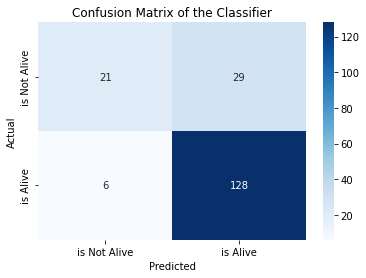

In [50]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['is Not Alive', 'is Alive'])

In [51]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6876


In [52]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.32)
('male', -0.7)
('book1_A_Game_Of_Thrones', -0.66)
('book2_A_Clash_Of_Kings', 1.68)
('book3_A_Storm_Of_Swords', -0.33)
('popularity', -1.47)
('m_dateOfBirth', 0.95)


<br>

### 2. Decision Trees - Full ###

In [53]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

fulltree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)

print('Full Tree Train-Test Gap   :', fulltree_test_gap)


Full Tree Training ACCURACY: 0.8947
Full Tree Testing ACCURACY : 0.7337
Full Tree AUC Score: 0.6228
Full Tree Train-Test Gap   : 0.161


In [54]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 18
True Positives : 116



### 3. Decision Trees - Pruned ###

In [55]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 8,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

## train test gap
prunedtree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)

print('Full Tree Train-Test Gap   :', prunedtree_test_gap)


Training ACCURACY: 0.8069
Testing  ACCURACY: 0.8043
AUC Score        : 0.6839
Full Tree Train-Test Gap   : 0.0026


In [56]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 7
True Positives : 127



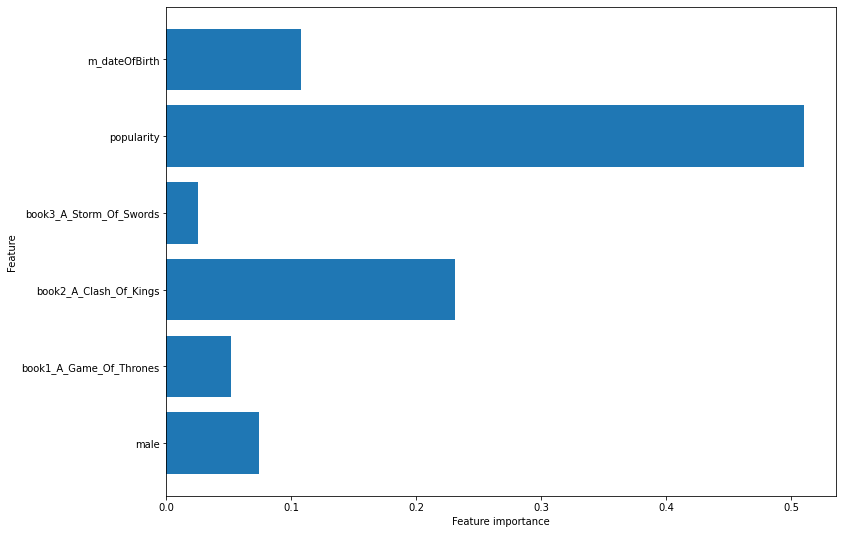

In [57]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

<br>

In [58]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],
    
    'Train Test Gap'    : [logreg_test_gap, fulltree_test_gap, prunedtree_test_gap],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6876         (21, 29, 6, 128)
Full Tree     0.6228         (19, 31, 18, 116)
Pruned Tree   0.6839         (21, 29, 7, 127)



,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"


<br>

### 4. Logistic Regression with Hyperparameter tuning using Randomized SearchCV ###

<br> In case of Hyperparameter tuning for all models wherever applicable, the codes were run at the time of creating the model. <br> The best estimated vales have been mentioned and directly used in the model. 

In [59]:
# ### Code used for hyperparameter tuning ######
# ########################################
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# C_range          = np.arange(0.1, 5.0, 0.1)
# warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_range,
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [60]:
########### The best estimator for the model based on Hyperparameter tuning #######################


##### Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
##### Tuned CV AUC      : 0.5842
    

In [61]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.0000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

## train test gap
lrtuned_test_gap = abs(lr_tuned_train_score - lr_tuned_test_score).round(4)

print('LR Tuned Train-Test Gap   :', lrtuned_test_gap)


LR Tuned Training ACCURACY: 0.7682
LR Tuned Testing  ACCURACY: 0.8098
LR Tuned AUC Score        : 0.6876
LR Tuned Train-Test Gap   : 0.0416


In [62]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 6
True Positives : 128



In [63]:

# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp),
                           'Train Test Gap'   : lrtuned_test_gap},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"


### 5. Hyperparamater tuning on Classification Trees ###

In [64]:
# # declaring a hyperparameter space
# criterion_range = ['gini', 'entropy']
# splitter_range  = ['best', 'random']
# depth_range     = np.arange(1, 25, 1)
# leaf_range      = np.arange(1, 100, 1)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_range,
#               'splitter'         : splitter_range,
#               'max_depth'        : depth_range,
#               'min_samples_leaf' : leaf_range}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 219)


# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                    param_distributions   = param_grid,
#                                    cv                    = 3,
#                                    n_iter                = 1000,
#                                    random_state          = 219,
#                                    scoring = make_scorer(roc_auc_score,
#                                              needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [65]:
############# The best estimator for the model based on Hyperparameter tuning ##########

##### Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'gini'}
##### Tuned Training AUC: 0.6673


In [66]:
# building a model based on hyperparameter tuning results

## max depth as 8 for this assignment 

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 5,
                                    max_depth        = 8,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Tuned Tree Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Test Tree Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('Tuned Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

## train test gap
treetuned_test_gap = abs(tree_tuned_train_score - tree_tuned_test_score).round(4)

print('Tuned Tree Train-Test Gap   :', treetuned_test_gap)


Tuned Tree Training ACCURACY: 0.8075
Test Tree Testing  ACCURACY: 0.8261
Tuned Tree AUC Score        : 0.7239
Tuned Tree Train-Test Gap   : 0.0186


In [67]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 7
True Positives : 127



In [68]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp),
                           'Train Test Gap'    : treetuned_test_gap},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"


### 6. Random Forest ###

In [69]:
# train/test split with the logit_sig variables
got_data   =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [70]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 5,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [71]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('RF Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('RF Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('RF AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))


# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)



## train test gap
rf_test_gap = abs(rf_train_acc - rf_test_acc).round(4)

print('RF Train-Test Gap   :', rf_test_gap)


RF Training ACCURACY: 0.845
RF Testing  ACCURACY: 0.837
RF AUC Score        : 0.7125
RF Train-Test Gap   : 0.008


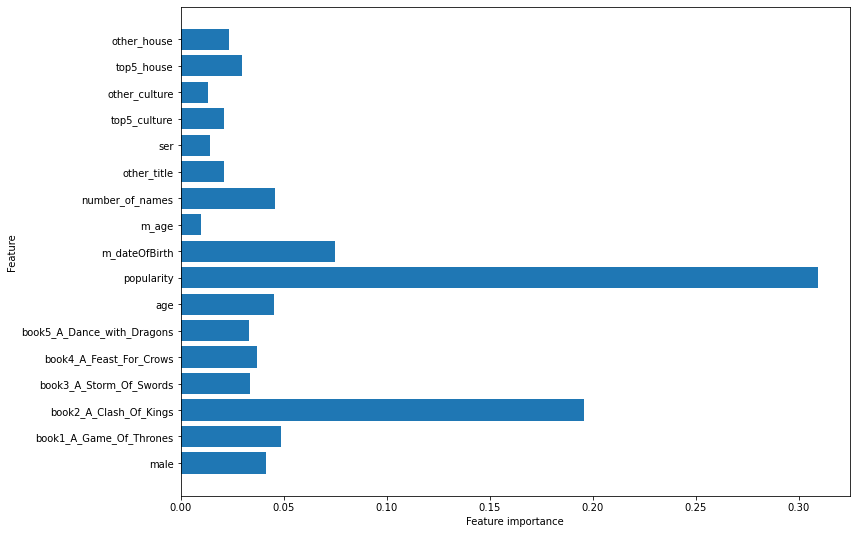

In [72]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [73]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 2
True Positives : 132



In [74]:

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp),
                           'Train Test Gap'     : rf_test_gap},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"
5,Random Forest (Full),0.7125,0.8450,0.8370,0.0080,"(22, 28, 2, 132)"


### 7. Random Forest with Hyperparameter tuning ###

In [75]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [76]:
########### The best estimator for the model based on Hyperparameter tuning ##########

###Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 
### 'criterion': 'entropy', 'bootstrap': True}
## Tuned Training AUC: 0.6457

In [77]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

## train test gap
forest_tuned_test_gap = abs(forest_tuned_train_score - forest_tuned_test_score).round(4)

print('Forest Tuned Train-Test Gap   :', forest_tuned_test_gap)

Forest Tuned Training ACCURACY: 0.9867
Forest Tuned Testing  ACCURACY: 0.9783
Forest Tuned AUC Score        : 0.9725
Forest Tuned Train-Test Gap   : 0.0084


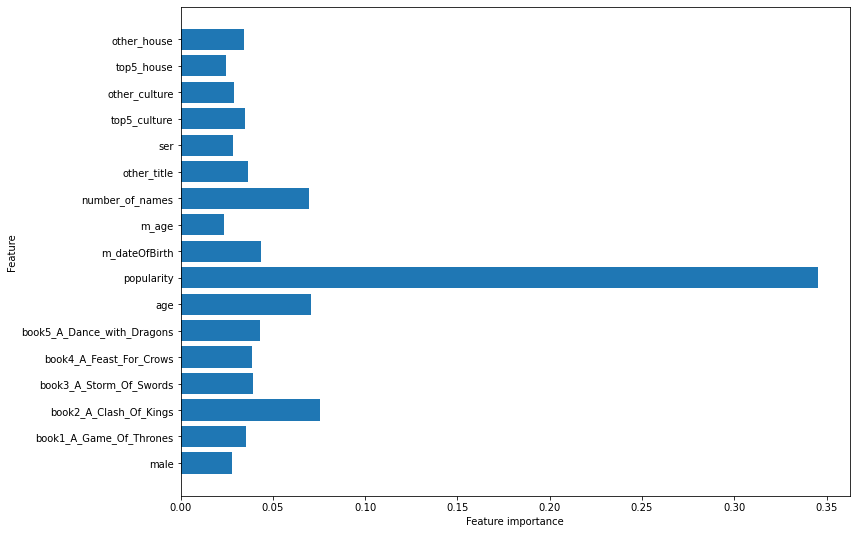

In [78]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [79]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 48
False Positives: 2
False Negatives: 2
True Positives : 132



In [80]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp),
                           'Train Test Gap'     : forest_tuned_test_gap},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"
5,Random Forest (Full),0.7125,0.8450,0.8370,0.0080,"(22, 28, 2, 132)"
6,Tuned Random Forest (Full),0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"


### 8. GBM ###

In [81]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)

## train test gap
gbm_test_gap = abs(gbm_train_acc - gbm_test_acc).round(4)

print('GBM Train-Test Gap   :', gbm_test_gap)

Training ACCURACY: 0.9867
Testing ACCURACY : 0.8043
AUC Score        : 0.734
GBM Train-Test Gap   : 0.1824


In [82]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 15
True Positives : 119



In [83]:

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp),
                          'Train Test Gap'    : gbm_test_gap},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"
5,Random Forest (Full),0.7125,0.8450,0.8370,0.0080,"(22, 28, 2, 132)"
6,Tuned Random Forest (Full),0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"
7,GBM (Full),0.7340,0.9867,0.8043,0.1824,"(29, 21, 15, 119)"


### 9. GBM with Hyperparameters ###

In [84]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2, 0.5)
# estimator_range    = np.arange(100, 300, 50)
# depth_range        = np.arange(2, 8, 1)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [85]:
##### It was not possible to evaluate the hyper paramaters, 
#### hence arbitrarily parameters have been chose by trial and error 

In [86]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 8,
                                       n_estimators  = 500,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('GBM Tuned Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('GBM Tuned Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('GBM Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# declaring model performance objects
gbm_tuned_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tuned_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)

## train test gap
gbm_tuned_test_gap = abs(gbm_tuned_train_acc - gbm_tuned_test_acc).round(4)

print('GBM Tuned Train-Test Gap   :', gbm_tuned_test_gap)

GBM Tuned Training ACCURACY: 0.9867
GBM Tuned Testing  ACCURACY: 0.9783
GBM Tuned AUC Score        : 0.9725
GBM Tuned Train-Test Gap   : 0.0084


In [87]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 48
False Positives: 2
False Negatives: 2
True Positives : 132



In [88]:

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_tuned_train_acc,
                          'Testing Accuracy'   : gbm_tuned_test_acc,
                          'AUC Score'          : gbm_tuned_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp),
                          'Train Test Gap'     : gbm_tuned_test_gap},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"
5,Random Forest (Full),0.7125,0.8450,0.8370,0.0080,"(22, 28, 2, 132)"
6,Tuned Random Forest (Full),0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"
7,GBM (Full),0.7340,0.9867,0.8043,0.1824,"(29, 21, 15, 119)"
8,Tuned GBM,0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"


In [89]:
## Printing the final results 

print(f""" 

    Based on the results obtained, the final chosen model is Tuned Random Forest as it provided the
    best results as below with best AUC score. \n 
   -------------------------------------------------------------------------
      
      Random Forest Tuned Training ACCURACY  :: {forest_tuned_train_score}
      Random Forest Tuned Testing  ACCURACY  :: {forest_tuned_test_score}
      Random Forest Tuned Train-Test Gap     :: {forest_tuned_test_gap}
      Random Forest Tuned AUC Score          :: {forest_tuned_auc}
      
    ------------------------------------------------------------------------ \n\n
      """)

print("The model performance table in descending order of AUC score as below:")

model_performance.sort_values(by = 'AUC Score',
                              ascending = False) 


 

    Based on the results obtained, the final chosen model is Tuned Random Forest as it provided the
    best results as below with best AUC score. 
 
   -------------------------------------------------------------------------
      
      Random Forest Tuned Training ACCURACY  :: 0.9867
      Random Forest Tuned Testing  ACCURACY  :: 0.9783
      Random Forest Tuned Train-Test Gap     :: 0.0084
      Random Forest Tuned AUC Score          :: 0.9725
      
    ------------------------------------------------------------------------ 


      
The model performance table in descending order of AUC score as below:


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
6,Tuned Random Forest (Full),0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"
8,Tuned GBM,0.9725,0.9867,0.9783,0.0084,"(48, 2, 2, 132)"
7,GBM (Full),0.7340,0.9867,0.8043,0.1824,"(29, 21, 15, 119)"
4,Tuned Tree,0.7239,0.8075,0.8261,0.0186,"(25, 25, 7, 127)"
5,Random Forest (Full),0.7125,0.8450,0.8370,0.0080,"(22, 28, 2, 132)"
0,Logistic,0.6876,0.7694,0.8098,0.0404,"(21, 29, 6, 128)"
3,Tuned LR,0.6876,0.7682,0.8098,0.0416,"(21, 29, 6, 128)"
2,Pruned Tree,0.6839,0.8069,0.8043,0.0026,"(21, 29, 7, 127)"
1,Full Tree,0.6228,0.8947,0.7337,0.1610,"(19, 31, 18, 116)"


<br> <br> 